In [3]:
import pandas as pd
import numpy as np
from io import StringIO

Data Loading:

Load your data into a suitable data structure like a pandas DataFrame. Assuming your data is stored in a CSV file, you can use the read_csv function:

In [2]:
from google.colab import files
uploaded=files.upload()

Saving train (1).csv to train (1).csv


In [50]:
train= pd.read_csv('train (1).csv')
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


Data Exploration:

Explore your data to understand its structure and identify any missing values or anomalies. You can use functions like head(), info(), and describe():

In [7]:
# Display the first few rows of the DataFrame
print(train.head())

# Get basic information about the DataFrame
print(train.info())

# Summary statistics for numeric columns
print(train.describe())

          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731

Data Cleaning:

Handle missing values: Check for missing data using isnull() and sum(), and decide how to handle missing values, either by imputing them or removing rows/columns with missing data.

In [4]:
train.isnull()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1458639,False,False,False,False,False,False,False,False,False,False,False
1458640,False,False,False,False,False,False,False,False,False,False,False
1458641,False,False,False,False,False,False,False,False,False,False,False
1458642,False,False,False,False,False,False,False,False,False,False,False


import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_0, *['pickup_datetime', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_1, *['dropoff_datetime', 'count()', None], **{})
chart

In [8]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
train=train.fillna("0")

In [10]:
train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

Data type conversion: Ensure that columns with timestamps are of the datetime data type for easy manipulation.

In [51]:
# Convert timestamp columns to datetime data type
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])

In [52]:
d = {'N': 0, 'Y': 1}
train['store_and_fwd_flag'] = train['store_and_fwd_flag'].map(d)

In [53]:
train = train.apply(pd.to_numeric, errors='coerce')

Feature Selection:

Select the relevant features for your analysis or modeling. Not all columns may be necessary for your specific task.

In [54]:
selected_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count','store_and_fwd_flag']
target_column = 'trip_duration'

In [55]:
selected_data = train[selected_features]

Data Visualization:

Use data visualization libraries like Matplotlib or Seaborn to visualize patterns and relationships in your data. This can help you identify outliers and gain insights into your data.

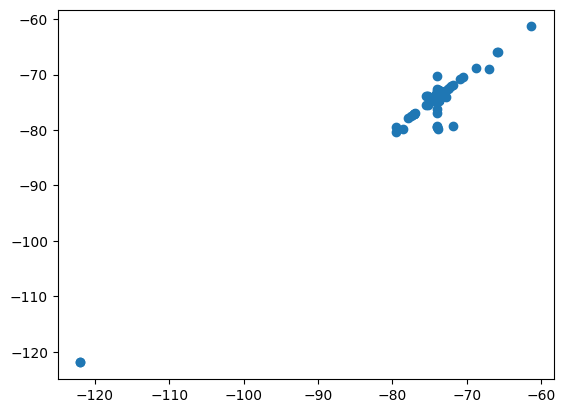

In [56]:
import matplotlib.pyplot as plt
plt.scatter(train['pickup_longitude'], train['dropoff_longitude'])
plt.show()

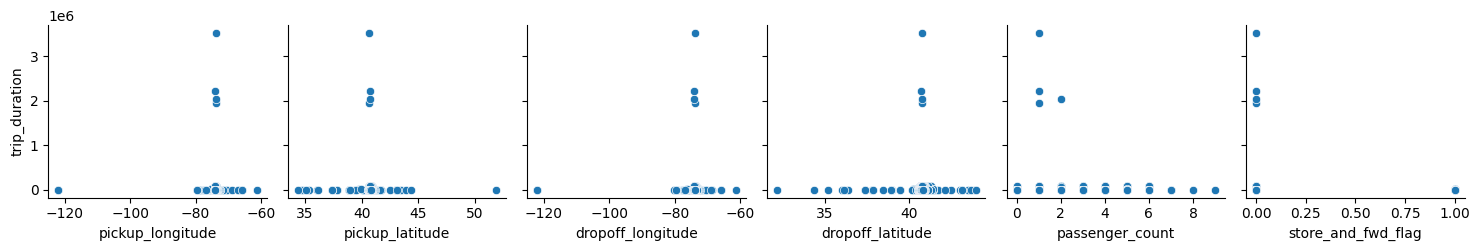

In [57]:
import seaborn as sns
sns.pairplot(data=train, x_vars=selected_features, y_vars=target_column, kind='scatter')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


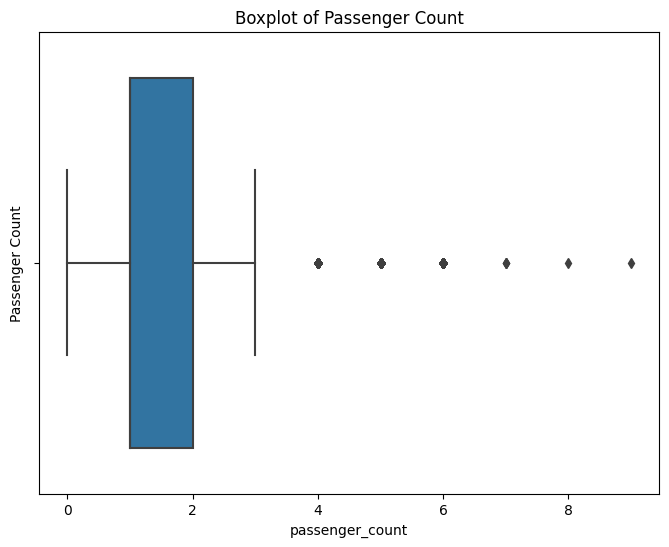

In [58]:
# Create a boxplot of 'passenger_count' to visualize its distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='passenger_count', data=train, orient='v')
plt.title('Boxplot of Passenger Count')
plt.ylabel('Passenger Count')
plt.show()

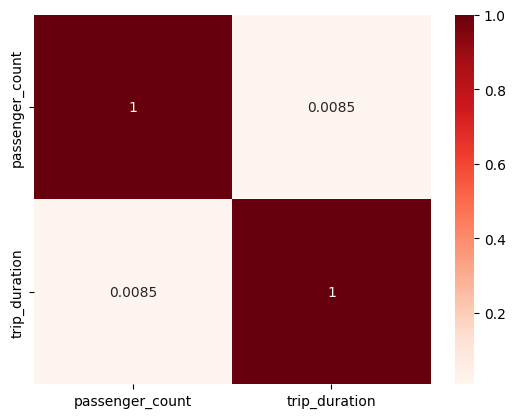

In [10]:
import seaborn as sns
sns.heatmap(train[['passenger_count','trip_duration']].corr(), annot=True, cmap = 'Reds')
plt.show()

presenting the mean, median mode, quartiles and other quantities

In [9]:
print(train.describe())

          vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count  1.458644e+06     1.458644e+06      1.458644e+06     1.458644e+06   
mean   1.534950e+00     1.664530e+00     -7.397349e+01     4.075092e+01   
std    4.987772e-01     1.314242e+00      7.090186e-02     3.288119e-02   
min    1.000000e+00     0.000000e+00     -1.219333e+02     3.435970e+01   
25%    1.000000e+00     1.000000e+00     -7.399187e+01     4.073735e+01   
50%    2.000000e+00     1.000000e+00     -7.398174e+01     4.075410e+01   
75%    2.000000e+00     2.000000e+00     -7.396733e+01     4.076836e+01   
max    2.000000e+00     9.000000e+00     -6.133553e+01     5.188108e+01   

       dropoff_longitude  dropoff_latitude  trip_duration  
count       1.458644e+06      1.458644e+06   1.458644e+06  
mean       -7.397342e+01      4.075180e+01   9.594923e+02  
std         7.064327e-02      3.589056e-02   5.237432e+03  
min        -1.219333e+02      3.218114e+01   1.000000e+00  
25%        -7.399133e+01


Data Splitting:

If you're building a predictive model, split your data into training and testing sets to evaluate model performance.

## Simple Linear Regression

Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:
One variable, **denoted x** , is regarded as the **predictor, explanatory, or independent variable**.
The other variable, **denoted y**, is regarded as **the response, outcome, or dependent variable.**



In [38]:
train

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,0,2,1457976295000000000,1457976750000000000,1,-73.982155,40.767937,-73.964630,40.765602,0,455
1,0,1,1465692215000000000,1465692878000000000,1,-73.980415,40.738564,-73.999481,40.731152,0,663
2,0,2,1453203324000000000,1453205448000000000,1,-73.979027,40.763939,-74.005333,40.710087,0,2124
3,0,2,1459971151000000000,1459971580000000000,1,-74.010040,40.719971,-74.012268,40.706718,0,429
4,0,2,1458999055000000000,1458999490000000000,1,-73.973053,40.793209,-73.972923,40.782520,0,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,0,2,1460122264000000000,1460123042000000000,4,-73.982201,40.745522,-73.994911,40.740170,0,778
1458640,0,1,1452411315000000000,1452411970000000000,1,-74.000946,40.747379,-73.970184,40.796547,0,655
1458641,0,2,1461308261000000000,1461309025000000000,1,-73.959129,40.768799,-74.004433,40.707371,0,764
1458642,0,1,1452009386000000000,1452009759000000000,1,-73.982079,40.749062,-73.974632,40.757107,0,373


In [19]:
train.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag             int64
trip_duration                  int64
dtype: object

In [59]:
# Data Splitting
X = selected_data
y = train[target_column]

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [61]:
print(X_train)

         pickup_longitude  pickup_latitude  dropoff_longitude  \
1011257        -73.979813        40.752529         -73.982681   
178550         -73.977623        40.746296         -73.968414   
551460         -73.950699        40.779404         -73.863129   
1434271        -73.984558        40.721802         -73.976753   
1173610        -73.967720        40.768742         -73.977173   
...                   ...              ...                ...   
259178         -73.955032        40.777328         -74.006203   
1414414        -73.973618        40.763920         -73.983849   
131932         -74.006195        40.734283         -73.949608   
671155         -73.962341        40.767323         -73.969757   
121958         -73.874649        40.774071         -74.004242   

         dropoff_latitude  passenger_count  store_and_fwd_flag  
1011257         40.763680                2                   0  
178550          40.788933                1                   0  
551460          40.76860

In [62]:
print(y_train)

1011257     844
178550     1001
551460     1048
1434271     784
1173610     732
           ... 
259178     1281
1414414     833
131932     1285
671155      389
121958     1570
Name: trip_duration, Length: 1021050, dtype: int64


##Training a Linear Regression Model

our train and test sets ready. Scikit-Learn has a various model types we can easily import and train

need to fit the line to our data, we will do that by using the **.fit()** method along with our X_train and y_train data

You can inspect the intercept and slope by printing the **regressor.intecept_**  and **regressor.coef_** attributes

In [63]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [64]:
regressor.intercept_

392802.35857546586

In [65]:
regressor.coef_

array([ 2926.92471371, -3679.03380244,  -580.72670888, -1678.70154398,
          29.73200176,    90.4133276 ])

In [66]:
print(regressor.coef_[0])

2926.924713709783


##Making Predictions

our own formula that calculates the value or  call on the **predict()** function

In [67]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

In [68]:
score = calc(regressor.coef_, regressor.intercept_, 9.5)
print(score)

[420608.14335571 357851.53745229 387285.45484111 376854.6939077
 393084.81259222 393661.28518762]


In [69]:
y_pred = regressor.predict(X_test)

In [75]:
y_pred

array([ 950.56132239,  891.53802559, 1044.05577699, ..., 1093.21372665,
        991.29198632,  840.4053315 ])

In [71]:
train_preds = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(train_preds)

         Actual    Predicted
67250      1040   950.561322
1397036     827   891.538026
1021087     614  1044.055777
951424      867  1009.915878
707882     4967  1948.212930
...         ...          ...
876090      826   834.307522
832420      474   703.332763
771092      478  1093.213727
1032031    1139   991.291986
726290     1062   840.405331

[437594 rows x 2 columns]


ACTUAL VS PREDICTED

<ipython-input-80-155e5d12bd8d>:7: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(y_test, y_pred, label='Predicted', alpha=0.5, color='red', marker='x', edgecolors='k', s=80)


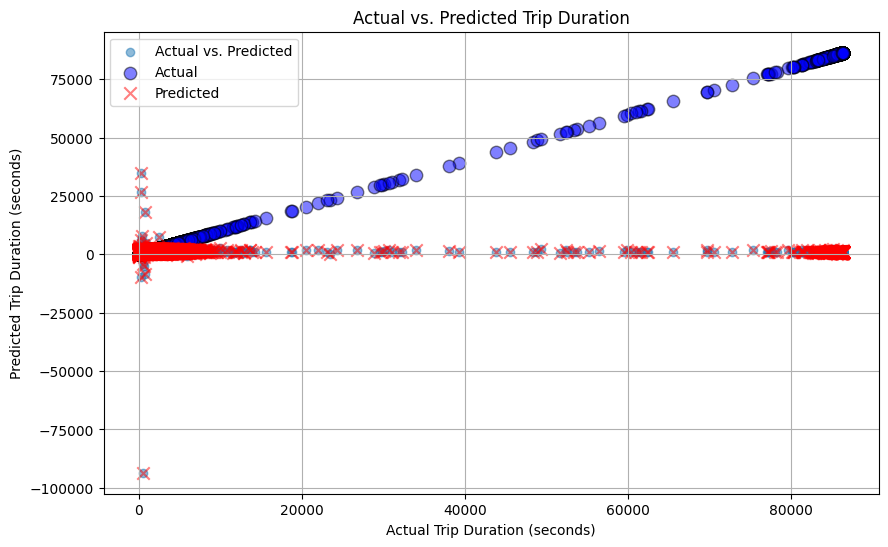

In [80]:
# Create a scatterplot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Actual vs. Predicted')


plt.scatter(y_test, y_test, label='Actual', alpha=0.5, color='blue', marker='o', edgecolors='k', s=80)
plt.scatter(y_test, y_pred, label='Predicted', alpha=0.5, color='red', marker='x', edgecolors='k', s=80)

plt.title('Actual vs. Predicted Trip Duration')
plt.xlabel('Actual Trip Duration (seconds)')
plt.ylabel('Predicted Trip Duration (seconds)')
plt.legend()
plt.grid(True)
plt.show()

TESTING

In [6]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test.csv


In [5]:
test=pd.read_csv('test.csv')

In [36]:
test

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.003464,40.725105,-74.001251,40.733643,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.006363,40.743782,-73.953407,40.782467,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.972267,40.759865,-73.876602,40.748665,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.976501,40.733562,-73.854263,40.891788,N


Data type conversion: Ensure that columns with timestamps are of the datetime data type for easy manipulation.

In [37]:
# Convert timestamp columns to datetime data type
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

In [38]:
d = {'N': 0, 'Y': 1}
test['store_and_fwd_flag'] = test['store_and_fwd_flag'].map(d)

In [ ]:
test = test.apply(pd.to_numeric, errors='coerce')

In [41]:
selected_features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [42]:
new_predictions = regressor.predict(test[selected_features])

In [43]:
new_predictions

array([ 970.2239217 , 1384.31419783,  965.83831934, ...,  891.40674722,
        692.70185582, 1040.52980765])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


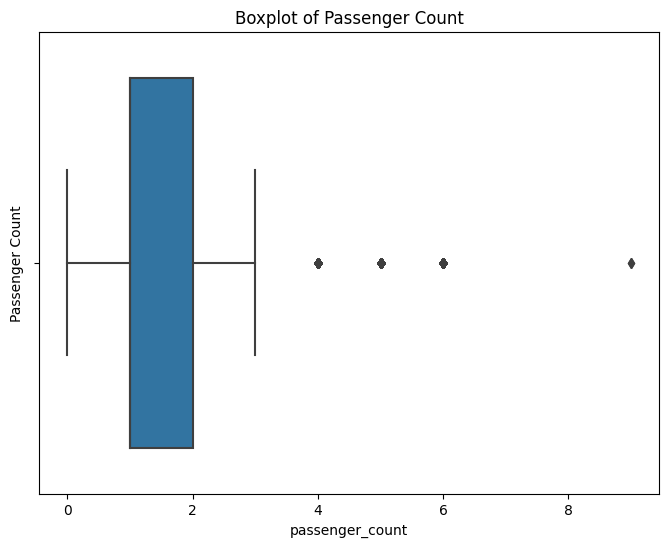

In [49]:
# Create a boxplot of 'passenger_count' to visualize its distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='passenger_count', data=test, orient='v')
plt.title('Boxplot of Passenger Count')
plt.ylabel('Passenger Count')
plt.show()


##Evaluating the Model


Using from sklearn.metrics import mean_absolute_error, mean_squared_error


In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [46]:
print(mae)
print(mse)
print(rmse)

597.7944302676306
10175040.983007852
3189.8340055570056
